In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from tabulate import tabulate

In [3]:
# Read the data form the excel file

# Read Excel file into a DataFrame
data = pd.read_excel('shs_ipat_data.xlsx', sheet_name='Germany', index_col=0, na_values=['nan', '0'])


# Separate the data for with the factors for the ipat decomposition

ipat = data[['Population', 'HH / Pop', 'DW / HH', 'new DW / tot DW', 'sqm / new DW [sqm]','CD / sqm [t / sqm]']].copy()

#Check that all the values are floats and in case they are not, convert them to floats
for column in ipat.columns:
    ipat[column] = pd.to_numeric(ipat[column], errors='coerce')

# Remove rows with invalid values
ipat = ipat.dropna()

print(tabulate(ipat, headers='keys', tablefmt='github'))


|   Year |   Population |   HH / Pop |   DW / HH |   new DW / tot DW |   sqm / new DW [sqm] |   CD / sqm [t / sqm] |
|--------|--------------|------------|-----------|-------------------|----------------------|----------------------|
|   2015 |   8.2176e+07 |   0.496179 |   1.01649 |        0.00522911 |              108.953 |             0.345835 |
|   2016 |   8.2522e+07 |   0.496352 |   1.01815 |        0.00565082 |              105.56  |             0.347122 |
|   2017 |   8.2792e+07 |   0.498889 |   1.01608 |        0.00584502 |              104.368 |             0.356597 |
|   2018 |   8.3019e+07 |   0.498416 |   1.02072 |        0.00595088 |              102.555 |             0.360025 |
|   2019 |   8.3167e+07 |   0.499068 |   1.02426 |        0.00601996 |              103.159 |             0.358736 |
|   2020 |   8.3155e+07 |   0.49433  |   1.0413  |        0.00627922 |              103.235 |             0.338458 |
|   2021 |   8.3237e+07 |   0.500967 |   1.03322 |        0.0059

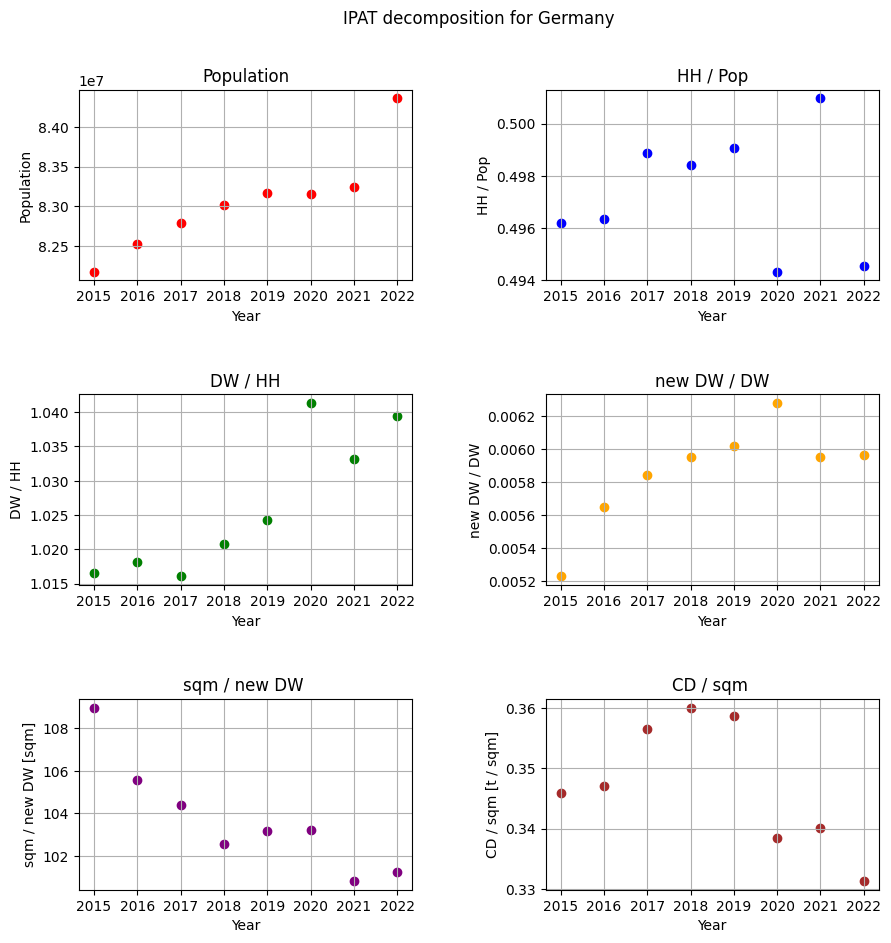

In [11]:
# Plots graphs for every column in the ipat decomposition with nice different colors

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('IPAT decomposition for Germany')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

axs[0, 0].scatter(ipat.index, ipat['Population'], color='red', marker='o')
axs[0, 0].set_title('Population')
axs[0,0].set_ylabel('Population')
axs[0,0].set_xlabel('Year')
axs[0,0].set_xticks(range(int(axs[0,0].get_xlim()[0])+1, int(axs[0,0].get_xlim()[1]) + 1))
axs[0,0].grid()

axs[0, 1].scatter(ipat.index, ipat['HH / Pop'], color='blue', marker='o')
axs[0, 1].set_title('HH / Pop')
axs[0,1].set_ylabel('HH / Pop')
axs[0,1].set_xlabel('Year')
axs[0,1].set_xticks(range(int(axs[0,1].get_xlim()[0])+1, int(axs[0,1].get_xlim()[1]) + 1))
axs[0,1].grid()

axs[1, 0].scatter(ipat.index, ipat['DW / HH'], color='green', marker='o')
axs[1, 0].set_title('DW / HH')
axs[1,0].set_ylabel('DW / HH')
axs[1,0].set_xlabel('Year')
axs[1,0].set_xticks(range(int(axs[1,0].get_xlim()[0])+1, int(axs[1,0].get_xlim()[1]) + 1))
axs[1,0].grid()

axs[1, 1].scatter(ipat.index, ipat['new DW / tot DW'], color='orange', marker='o')
axs[1, 1].set_title('new DW / DW')
axs[1,1].set_ylabel('new DW / DW')
axs[1,1].set_xlabel('Year')
axs[1,1].set_xticks(range(int(axs[1,1].get_xlim()[0])+1, int(axs[1,1].get_xlim()[1]) + 1))
axs[1,1].grid()

axs[2, 0].scatter(ipat.index, ipat['sqm / new DW [sqm]'], color='purple', marker='o')
axs[2, 0].set_title('sqm / new DW ')
axs[2,0].set_ylabel('sqm / new DW [sqm]')
axs[2,0].set_xlabel('Year')
axs[2,0].set_xticks(range(int(axs[2,0].get_xlim()[0])+1, int(axs[2,0].get_xlim()[1]) + 1))
axs[2,0].grid()

axs[2, 1].scatter(ipat.index, ipat['CD / sqm [t / sqm]'], color='brown', marker='o')
axs[2, 1].set_title('CD / sqm ')
axs[2,1].set_ylabel('CD / sqm [t / sqm]')
axs[2,1].set_xlabel('Year')
axs[2,1].set_xticks(range(int(axs[2,1].get_xlim()[0])+1, int(axs[2,1].get_xlim()[1]) + 1))
axs[2,1].grid()

plt.show()

In [5]:
# Compute a linear regression for every column in the ipat decomposition, computing also the CHI squared value and saves the data in a dictionary

ipat_regression = {}

for column in ipat.columns:
    slope, intercept, r_value, p_value, std_err = linregress(ipat.index, ipat[column])
    ipat_regression[column] = {'slope': slope, 'intercept': intercept, 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}

# moves the dictionary into a dataframe and plots it

ipat_regression_df = pd.DataFrame(ipat_regression).T
print(ipat_regression_df)


                            slope     intercept   r_value   p_value  \
Population          239202.380952 -3.997766e+08  0.912953  0.001543   
HH / Pop                -0.000017  5.313618e-01 -0.017509  0.967178   
DW / HH                  0.003758 -6.558557e+00  0.889445  0.003104   
new DW / tot DW          0.000096 -1.872613e-01  0.756811  0.029717   
sqm / new DW [sqm]      -0.958002  2.037463e+03 -0.899440  0.002354   
CD / sqm [t / sqm]      -0.002297  4.984734e+00 -0.537011  0.169936   

                         std_err  
Population          43648.631079  
HH / Pop                0.000393  
DW / HH                 0.000788  
new DW / tot DW         0.000034  
sqm / new DW [sqm]      0.190039  
CD / sqm [t / sqm]      0.001473  


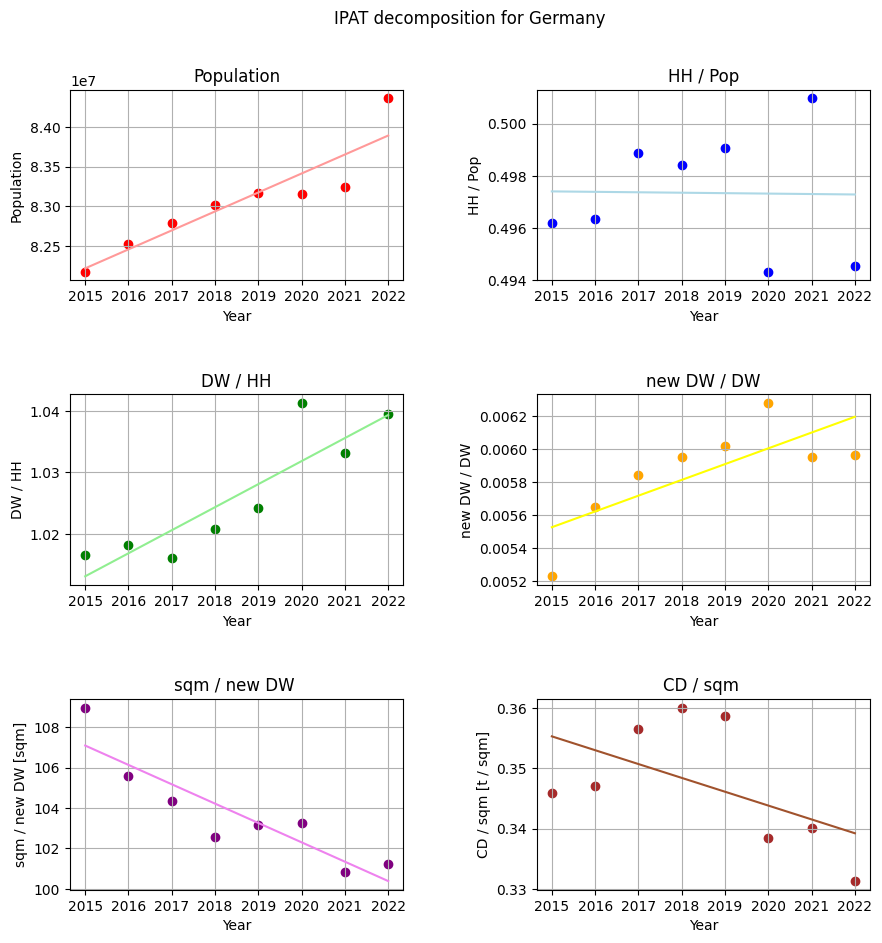

In [9]:
# Redoes the plots with the linear regression

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('IPAT decomposition for Germany')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

axs[0, 0].scatter(ipat.index,ipat['Population'], color='red', marker='o')
axs[0, 0].plot(ipat.index, ipat_regression_df['slope']['Population']*ipat.index + ipat_regression_df['intercept']['Population'], color=(1.0, 0.6, 0.6))
axs[0, 0].set_title('Population')
axs[0,0].set_ylabel('Population')
axs[0,0].set_xlabel('Year')
axs[0,0].set_xticks(range(int(axs[0,0].get_xlim()[0])+1, int(axs[0,0].get_xlim()[1]) + 1))
axs[0,0].grid()

axs[0, 1].scatter(ipat.index,ipat['HH / Pop'], color='blue', marker='o')
axs[0, 1].plot(ipat.index, ipat_regression_df['slope']['HH / Pop']*ipat.index + ipat_regression_df['intercept']['HH / Pop'], color='lightblue')
axs[0, 1].set_title('HH / Pop')
axs[0,1].set_ylabel('HH / Pop')
axs[0,1].set_xlabel('Year')
axs[0,1].set_xticks(range(int(axs[0,1].get_xlim()[0])+1, int(axs[0,1].get_xlim()[1]) + 1))
axs[0,1].grid()

axs[1, 0].scatter(ipat.index,ipat['DW / HH'], color='green', marker='o')
axs[1, 0].plot(ipat.index, ipat_regression_df['slope']['DW / HH']*ipat.index + ipat_regression_df['intercept']['DW / HH'], color='lightgreen')
axs[1, 0].set_title('DW / HH')
axs[1,0].set_ylabel('DW / HH')
axs[1,0].set_xlabel('Year')
axs[1,0].set_xticks(range(int(axs[1,0].get_xlim()[0])+1, int(axs[1,0].get_xlim()[1]) + 1))
axs[1,0].grid()

axs[1, 1].scatter(ipat.index,ipat['new DW / tot DW'], color='orange', marker='o')
axs[1, 1].plot(ipat.index, ipat_regression_df['slope']['new DW / tot DW']*ipat.index + ipat_regression_df['intercept']['new DW / tot DW'], color='yellow')
axs[1, 1].set_title('new DW / DW')
axs[1,1].set_ylabel('new DW / DW')
axs[1,1].set_xlabel('Year')
axs[1,1].set_xticks(range(int(axs[1,1].get_xlim()[0])+1, int(axs[1,1].get_xlim()[1]) + 1))
axs[1,1].grid()

axs[2, 0].scatter(ipat.index,ipat['sqm / new DW [sqm]'], color='purple',marker='o')
axs[2, 0].plot(ipat.index, ipat_regression_df['slope']['sqm / new DW [sqm]']*ipat.index + ipat_regression_df['intercept']['sqm / new DW [sqm]'], color='violet')
axs[2, 0].set_title('sqm / new DW ')
axs[2,0].set_ylabel('sqm / new DW [sqm]')
axs[2,0].set_xlabel('Year')
axs[2,0].set_xticks(range(int(axs[2,0].get_xlim()[0])+1, int(axs[2,0].get_xlim()[1]) + 1))
axs[2,0].grid()

axs[2, 1].scatter(ipat.index,ipat['CD / sqm [t / sqm]'], color='brown', marker='o')
axs[2, 1].plot(ipat.index, ipat_regression_df['slope']['CD / sqm [t / sqm]']*ipat.index + ipat_regression_df['intercept']['CD / sqm [t / sqm]'], color='sienna')
axs[2, 1].set_title('CD / sqm ')
axs[2,1].set_ylabel('CD / sqm [t / sqm]')
axs[2,1].set_xlabel('Year')
axs[2,1].set_xticks(range(int(axs[2,1].get_xlim()[0])+1, int(axs[2,1].get_xlim()[1]) + 1))
axs[2,1].grid()

plt.show()

